In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [3]:
data =pd.read_csv(r'C:\Users\ahmed\Documents\New folder\cardio_train.csv\cardio_train.csv',sep=';')

In [4]:
data.drop(['id'],axis=1,inplace=True)

In [5]:
x = data.drop('cardio', axis=1)
y = data['cardio']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,
)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
x_train


array([[ 0.97638644, -0.73377059, -1.26391038, ..., -0.31207962,
        -0.24087574,  0.49410558],
       [-1.11280043,  1.36282377, -0.28679781, ..., -0.31207962,
        -0.24087574, -2.02385896],
       [ 0.67347662,  1.36282377,  1.17887105, ..., -0.31207962,
        -0.24087574,  0.49410558],
       ...,
       [ 1.67008234, -0.73377059,  0.56817569, ..., -0.31207962,
        -0.24087574,  0.49410558],
       [-0.50131135, -0.73377059,  0.32389755, ..., -0.31207962,
        -0.24087574, -2.02385896],
       [-1.76195076,  1.36282377,  1.54528826, ..., -0.31207962,
        -0.24087574,  0.49410558]])

In [9]:
model =Sequential()
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
hist=model.fit(x_train,y_train,batch_size=130,epochs=10,validation_split=0.2)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6924 - loss: 0.5926 - val_accuracy: 0.7255 - val_loss: 0.5567
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7277 - loss: 0.5549 - val_accuracy: 0.7307 - val_loss: 0.5465
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7303 - loss: 0.5480 - val_accuracy: 0.7326 - val_loss: 0.5449
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7308 - loss: 0.5452 - val_accuracy: 0.7307 - val_loss: 0.5459
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7309 - loss: 0.5447 - val_accuracy: 0.7310 - val_loss: 0.5462
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7323 - loss: 0.5437 - val_accuracy: 0.7344 - val_loss: 0.5427
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 0.5417 - val_accuracy: 0.7315 - val_loss: 0.5460
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7328 - loss: 0.5415 - val_accuracy: 0.

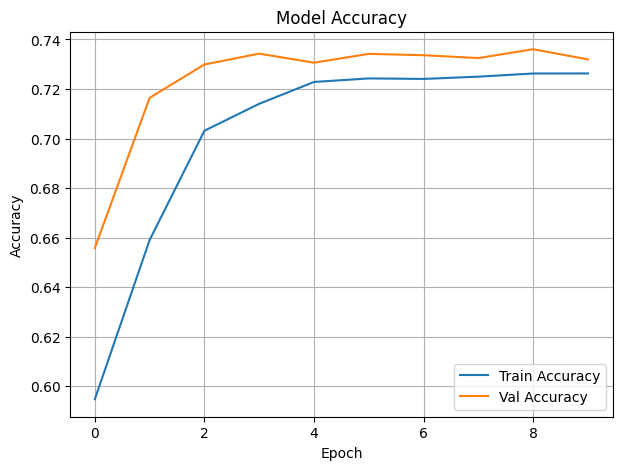

In [31]:
plt.figure(figsize=(7,5))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

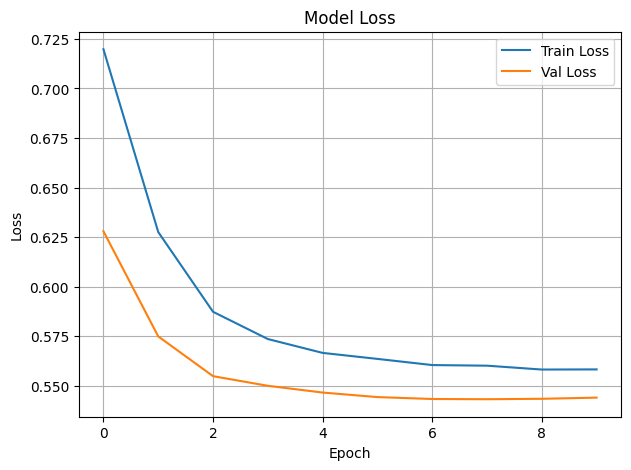

In [32]:
plt.figure(figsize=(7,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [12]:
model.evaluate(x_test,y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7382 - loss: 0.5438


[0.5437836050987244, 0.7382143139839172]

In [13]:
model2 = Sequential()

model2.add(Dense(256, activation='relu', input_shape=(11,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(1, activation='sigmoid'))

In [14]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
hist_model2=model2.fit(x_train,y_train,batch_size=130,epochs=10,validation_split=0.2)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7285 - loss: 0.5555 - val_accuracy: 0.7379 - val_loss: 0.5419
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7298 - loss: 0.5547 - val_accuracy: 0.7362 - val_loss: 0.5424
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7286 - loss: 0.5539 - val_accuracy: 0.7360 - val_loss: 0.5414
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7280 - loss: 0.5543 - val_accuracy: 0.7344 - val_loss: 0.5422
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7297 - loss: 0.5534 - val_accuracy: 0.7380 - val_loss: 0.5408
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7293 - loss: 0.5534 - val_accuracy: 0.7370 - val_loss: 0.5410
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7292 - loss: 0.5532 - val_accuracy: 0.7366 - val_loss: 0.5415
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7287 - loss: 0.5526 - val_accuracy: 0.

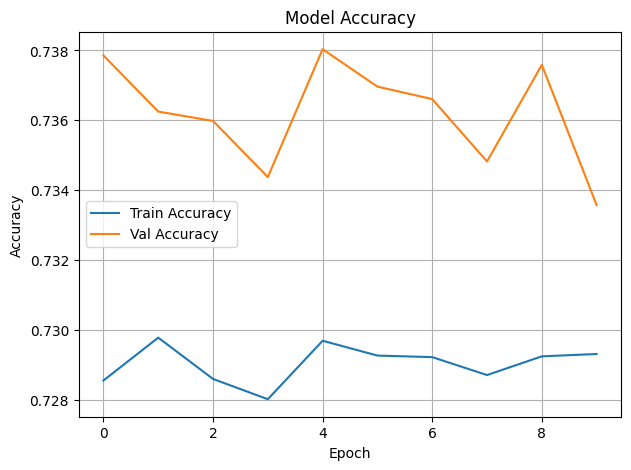

In [37]:
plt.figure(figsize=(7,5))
plt.plot(hist_model2.history['accuracy'], label='Train Accuracy')
plt.plot(hist_model2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

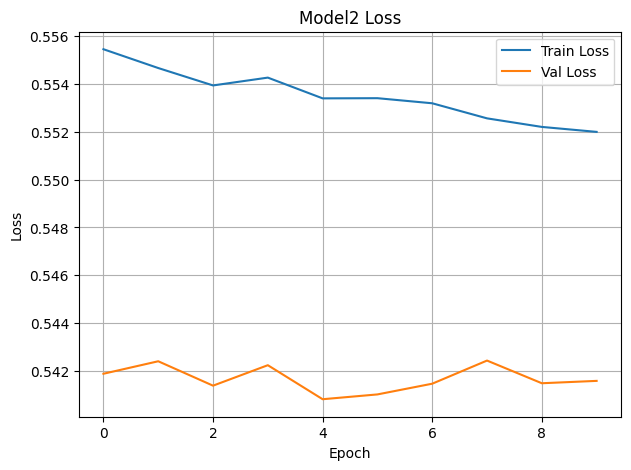

In [40]:
plt.figure(figsize=(7,5))
plt.plot(hist_model2.history['loss'], label='Train Loss')
plt.plot(hist_model2.history['val_loss'], label='Val Loss')
plt.title('Model2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [42]:
# Use Autoencoders (12→8→4→8→12) for unsupervised feature learning
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

model_encode = Model(inputs=input_layer, outputs=decoded)
model_encode.compile(optimizer='adam', loss='mse')

hist_model_encode=model_encode.fit(x_train, x_train,batch_size=32,epochs=50,validation_split=0.2)
                
                
                

Epoch 1/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7146 - val_loss: 0.5403
Epoch 2/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4551 - val_loss: 0.4487
Epoch 3/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4094 - val_loss: 0.4256
Epoch 4/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3825 - val_loss: 0.4057
Epoch 5/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3615 - val_loss: 0.3936
Epoch 6/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3478 - val_loss: 0.3858
Epoch 7/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3397 - val_loss: 0.3828
Epoch 8/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3344 - val_loss: 0.3799
Epoch 9/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3314 - val_loss: 0.3796
Epoch 10/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3296 - val_loss: 0.3787
Epoch 11/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3279 - val_loss: 0.3755
Epoch 12/50
1400/1400 ━━━━━━━━

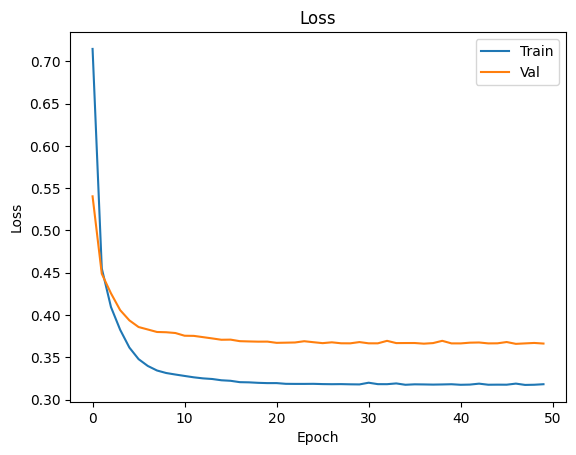

In [43]:


plt.plot(hist_model_encode.history['loss'])
plt.plot(hist_model_encode.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()


In [17]:
encoder = Model(inputs=input_layer, outputs=encoded)
x_train_emb = encoder.predict(x_train)
x_test_emb = encoder.predict(x_test)

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step


In [18]:
# Implement wide & deep architecture combining raw features and embeddings
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.optimizers import Adam


In [19]:
wide_input = Input(shape=(x_train.shape[1],), name='wide_input')
deep_input = Input(shape=(x_train_emb.shape[1],), name='deep_input')

In [20]:
x = Dense(256, activation='relu')(deep_input)
x = BatchNormalization()(x)  
x = Dropout(0.3)(x) 

x = Dense(128, activation='relu')(x)         
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)         
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)           
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(16, activation='relu')(x)          
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
combined = concatenate([wide_input, x])
output = Dense(1, activation='sigmoid')(combined)

In [21]:

model_d = Model(inputs=[wide_input, deep_input], outputs=output)


In [22]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_model_d = model.fit([x_train, x_train_emb], y_train,
                    
                    epochs=50,
                    batch_size=32)

Epoch 1/50


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 11))', 'Tensor(shape=(32, 4))')
  warnings.warn(msg)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7321 - loss: 0.5468
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7322 - loss: 0.5454
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7323 - loss: 0.5439
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7333 - loss: 0.5423
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7338 - loss: 0.5415
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7342 - loss: 0.5408
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7345 - loss: 0.5395
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7362 - loss: 0.5392
Epoch 9/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7362 - loss: 0.5388
Epoch 10/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7364 - loss: 0.5376
Epoch 11/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7367 - loss: 0.5367
Epoch 12/50
1750/1750 ━━━━━━━━━━━━━━━━━━━

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgboost
from sklearn.metrics import accuracy_score

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xg = xgboost.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [25]:
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
xg.fit(x_train, y_train)

c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:29:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [26]:
rf_pred = rf.predict(x_test)
gb_pred = gb.predict(x_test)
xg_pred = xg.predict(x_test)
print(" Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Accuracy:", accuracy_score(y_test, gb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xg_pred))

 Forest Accuracy: 0.7129285714285715
Gradient Accuracy: 0.7377857142857143
XGBoost Accuracy: 0.7357142857142858


In [27]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

In [46]:
dnn_pred = (model_d.predict([x_test, x_test_emb]) > 0.5).astype(int).flatten()
table = np.zeros((2,2))
for i in range(len(y_test)):
    table[dnn_pred[i]][rf_pred[i]] += 1

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
result = mcnemar(table, exact=True)
print("McNemar Test p-value (DNN vs RF):", result.pvalue)
if result.pvalue < 0.05:
    print("found")
else:
    print("not found")

McNemar Test p-value (DNN vs RF): 1.9408161672222604e-45
found
